In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import sunpy.map
import yt
from astropy.coordinates import SkyCoord
import synthesizAR

%matplotlib inline

## Create Field with synthesizAR

In [9]:
hmi = sunpy.map.Map('/Users/willbarnes/sunpy/data/hmi_m_45s_2010_09_29_23_52_30_tai_magnetogram.fits').rotate()

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/image/transform.py:128: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


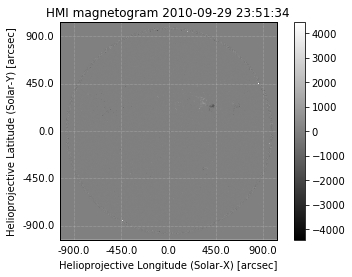

In [10]:
hmi.peek()

In [11]:
width = 300*u.arcsec
height = 300*u.arcsec
lc = SkyCoord(361.5*u.arcsec-width/2, 261.5*u.arcsec-height/2,frame=hmi.coordinate_frame)
rc = SkyCoord(361.5*u.arcsec+width/2, 261.5*u.arcsec+height/2,frame=hmi.coordinate_frame)

In [12]:
hmi_zoom = hmi.submap(lc,rc)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


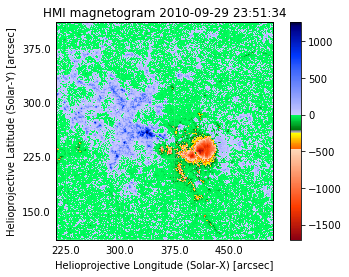

In [13]:
hmi_zoom.peek(cmap='hmimag')

In [14]:
field = synthesizAR.Skeleton(hmi_zoom,resample=[100,100]*u.pixel)

In [15]:
field.extrapolate_field(100,[0,300]*u.arcsec)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:81: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  self.xrange = self.map_boundary_data.xrange.to(map_magnetogram.meta['cunit1'])
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:82: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  self.yrange = self.map_boundary_data.yrange.to(map_magnetogram.meta['cunit2'])
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:83: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  self.xobsrange = self.map_boundary_data.xrange.to(map_magnetogram.meta['cunit1'])
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:84: SunpyDeprecationWarning: This property is only valid for non-ro

True


/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/field.py:187: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcx, rcx = self.hmi_map.xrange + self.hmi_map.scale.axis1*u.Quantity([boundary_clipping[0], -boundary_clipping[0]], u.pixel)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/field.py:188: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcy, rcy = self.hmi_map.yrange + self.hmi_map.scale.axis2*u.Quantity([boundary_clipping[1], -boundary_clipping[1]], u.pixel)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/field.py:195: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  bbox = np.array([self._convert_angle_to_length(self.clipped_hmi_map.xrange).value,
/Users/willbarnes/anaconda/envs/synthesizar/lib/p

In [16]:
field.extract_streamlines(200)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/util/util.py:64: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  length_x = convert_angle_to_length(boundary_map_resampled, boundary_map_resampled.xrange)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/util/util.py:65: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  length_y = convert_angle_to_length(boundary_map_resampled, boundary_map_resampled.yrange)
yt : [INFO     ] 2018-02-01 13:50:11,757 AMRKDTree rebuilt, Final Volume: 9.124062e+30
Streamlining: 100%|██████████| 200/200 [00:00<00:00, 562.45it/s]
yt : [INFO     ] 2018-02-01 13:50:12,528 AMRKDTree rebuilt, Final Volume: 9.124062e+30
Streamlining: 100%|██████████| 79/79 [00:00<00:00, 539.98it/s]
yt : [INFO     ] 2018-02-01 13:50:13,058 AMRKDTree rebuilt, Final Volume: 9.124062e+30
Streamlining:

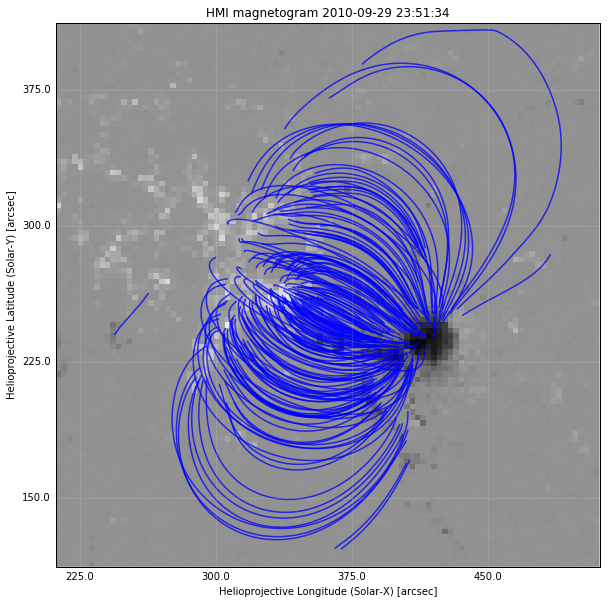

In [17]:
field.peek()

In [18]:
field._map_3d.shape

(100, 100, 100, 3)

## Save $B$ to file

In [59]:
# save the 3d field
# save 3 files, one for each magnetic field component
# each file will be a series of consecutive slices in z, with each slice being a y-by-x slice
index_b_mapping = [(1,'bx'),(0,'by'),(2,'bz')]
fn_format = '/Users/willbarnes/Desktop/potential_field.{}'
for ibm in index_b_mapping:
	with open(fn_format.format(ibm[1]),'wb') as f:
		f.write(str.encode('// ny,nx,nz={}\n'.format(field._map_3d[:,:,:,ibm[0]].shape)))
		for i in range(field._map_3d[:,:,:,ibm[0]].shape[-1]):
			np.savetxt(f,field._map_3d[:,:,i,ibm[0]])
			f.write(b'////////////\n')

## Load $B$ back in

In [60]:
B_field = np.empty((100,100,100,3))
for j,b in ([(1,'bx'),(0,'by'),(2,'bz')]):
    with open(f'/Users/willbarnes/Desktop/potential_field.{b}','r') as f:
        lines = f.readlines()
    z_counter = 0
    x_counter = 0
    for i,l in enumerate(lines):
        if i == 0:
            continue
        if '/' in l:
            x_counter = 0
            z_counter += 1
            continue
        B_field[x_counter,:,z_counter,j] = np.array(l.split(),dtype=np.float64)
        x_counter += 1

In [61]:
round_tripped_field = synthesizAR.Skeleton()
round_tripped_field.hmi_map = field.hmi_map
round_tripped_field.extrapolated_3d_field = round_tripped_field._transform_to_yt(B_field,field._zrange)
round_tripped_field._map_3d = B_field
round_tripped_field._zrange = field._zrange

No HMI fits file supplied. A new HMI map object will not be created.
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/field.py:187: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcx, rcx = self.hmi_map.xrange + self.hmi_map.scale.axis1*u.Quantity([boundary_clipping[0], -boundary_clipping[0]], u.pixel)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/field.py:188: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcy, rcy = self.hmi_map.yrange + self.hmi_map.scale.axis2*u.Quantity([boundary_clipping[1], -boundary_clipping[1]], u.pixel)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/field.py:195: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  bbox = np.array([self._convert_angle_to_length(self.clipped_hmi

In [62]:
round_tripped_field.extract_streamlines(200)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/util/util.py:64: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  length_x = convert_angle_to_length(boundary_map_resampled, boundary_map_resampled.xrange)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev547-py3.6.egg/synthesizAR/util/util.py:65: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  length_y = convert_angle_to_length(boundary_map_resampled, boundary_map_resampled.yrange)
yt : [INFO     ] 2018-02-01 14:19:28,790 AMRKDTree rebuilt, Final Volume: 9.124062e+30
Streamlining: 100%|██████████| 200/200 [00:00<00:00, 544.64it/s]
yt : [INFO     ] 2018-02-01 14:19:29,583 AMRKDTree rebuilt, Final Volume: 9.124062e+30
Streamlining: 100%|██████████| 69/69 [00:00<00:00, 509.16it/s]
yt : [INFO     ] 2018-02-01 14:19:30,083 AMRKDTree rebuilt, Final Volume: 9.124062e+30
Streamlining:

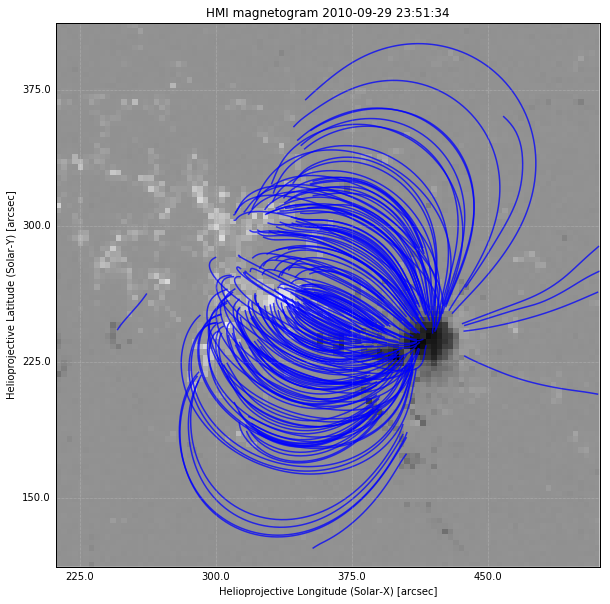

In [63]:
round_tripped_field.peek()

yt : [INFO     ] 2018-02-01 14:22:00,390 Projection completed
yt : [INFO     ] 2018-02-01 14:22:00,391 xlim = 15848267802.142771 36889738316.022331
yt : [INFO     ] 2018-02-01 14:22:00,392 ylim = 8844133285.812077 29668681423.259884
yt : [INFO     ] 2018-02-01 14:22:00,396 xlim = 15848267802.142769 36889738316.022331
yt : [INFO     ] 2018-02-01 14:22:00,397 ylim = 8844133285.812077 29668681423.259884
yt : [INFO     ] 2018-02-01 14:22:00,399 Making a fixed resolution buffer of (('stream', 'Bz')) 800 by 800
yt : [WARNING  ] 2018-02-01 14:22:00,421 Plot image for field ('stream', 'Bz') has both positive and negative values. Min = -322916890.251044, Max = 137790655.425569.
yt : [WARNING  ] 2018-02-01 14:22:00,422 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2018-02-01 14:22:00,792 Projection completed
yt : [INFO     ] 2018-02-01 14:22:00,868 Projection completed



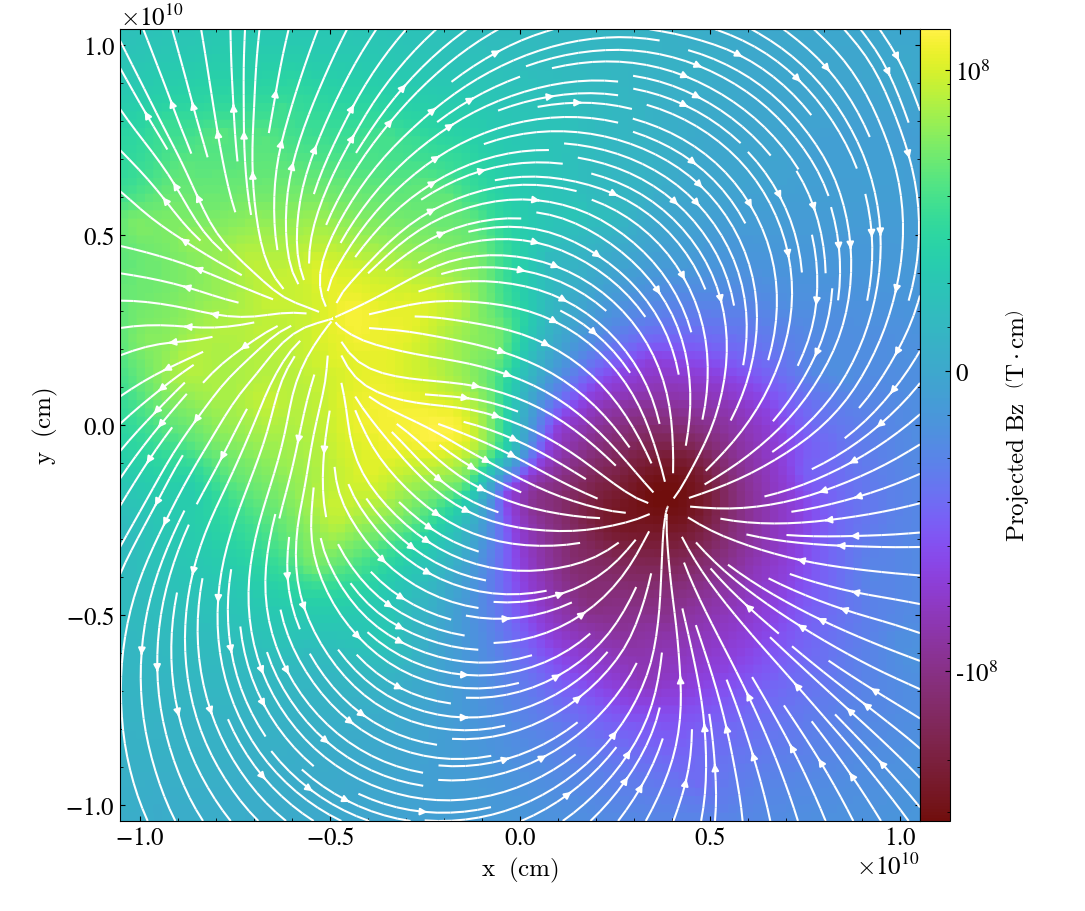

In [64]:
#center=(extrap_field.domain_center
#        +np.array([0,0,-0.49])*extrap_field.domain_width)
p = yt.ProjectionPlot(round_tripped_field.extrapolated_3d_field,'z','Bz',
                 #origin='lower-right-domain',
                 axes_unit='cm',
                 #center=center,
                 #width=((1*extrap_field.domain_width.value[1],'cm'),
                 #       (1*extrap_field.domain_width.value[2],'cm'))
                )
p.annotate_streamlines('Bx','By',density=2,plot_args={'color':'w'})
#p.set_zlim('Bz',-3e-2,3e-2)
#p.set_log('Bz',True,linthresh=1e-3)
p.show()

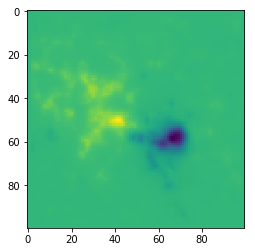

In [66]:
plt.imshow(np.flipud(B_field[:,:,2,2]))

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


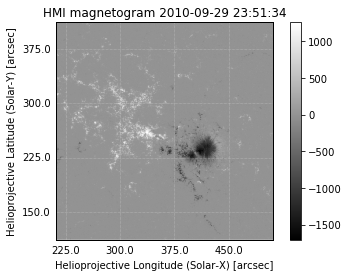

In [53]:
hmi_zoom.peek()